# **IMPORTS**

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# **POSITIONAL ENCODING**
**basis of code is from: https://www.tensorflow.org/tutorials/text/transformer**


In [7]:

def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
  pos_encoding = angle_rads[np.newaxis, ...]
    
  return pos_encoding

# To check Matrix is Orthogonal

"The function defined is to check for the pairwise orthogonality of the new basis"


In [8]:
def orth_check(Matrix):
    """
    This function check for the pairwise orthogonality of the new basis
    """
    error_tol=1.e-6
    TransMatrix = Matrix.transpose()
    dot_matrix = np.dot(TransMatrix,Matrix)
    if (dot_matrix - np.eye(dot_matrix.shape[0]) < error_tol).all():
        print('B Matrix is Orthogonal')
        return True

    else:
        error = dot_matrix - np.eye(dot_matrix.shape[0])
        print('\nB Matrix is NOT Orthogonal')
        return False

# Grams Schmidt Method to make Matrix Orthogonal 

"Applies the Gram-Schmidt method to A and returns Q and R, so Q\*R = A."

In [9]:
def gramschmidt(A):
    """
    Applies the Gram-Schmidt method to A
    and returns Q and R, so Q*R = A.
    """
    R = np.zeros((A.shape[1], A.shape[1]))
    Q = np.zeros(A.shape)
    for k in range(0, A.shape[1]):
        R[k, k] = np.sqrt(np.dot(A[:, k], A[:, k]))
        Q[:, k] = A[:, k]/R[k, k]
        for j in range(k+1, A.shape[1]):
            R[k, j] = np.dot(Q[:, k], A[:, j])
            A[:, j] = A[:, j] - R[k, j]*Q[:, k]
    return Q, R

# Generate a 16 x 16 dimension position encoding

In [10]:
tokens     = 16
dimensions = 16
B = positional_encoding(tokens, dimensions)
B = B[0,:,:] 

# To Check Generated matrix is Orthogonal

In [11]:
check = orth_check(B)
if check is False:
    print('\nMaking Basis vector orthogonal and Orthonormal using G-S method\n')
    Q,R =gramschmidt(B)



B Matrix is NOT Orthogonal

Making Basis vector orthogonal and Orthonormal using G-S method



# -------- Plotting Not Orthogonal --------

Plot : Positional Encoding Matrix B - Not Orthogonal 


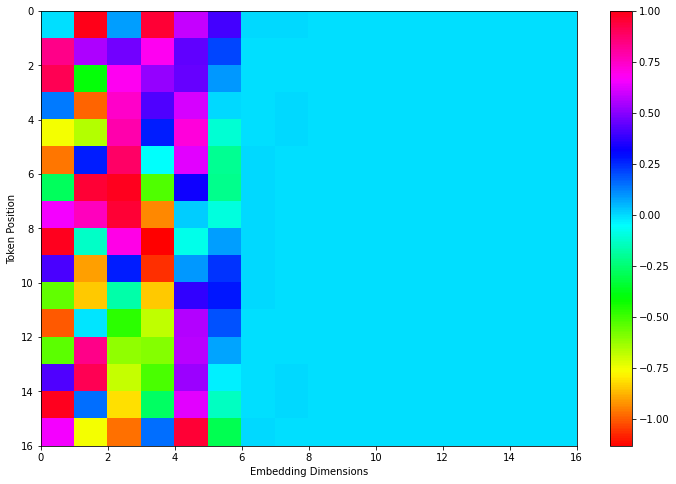

In [14]:
print('Plot : Positional Encoding Matrix B - Not Orthogonal ')
plt.figure(figsize=(12,8))
plt.pcolormesh(B, cmap='hsv')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

# -------- Plotting Vector made Orthogonal by G-S Method --------

Plot : Positional Encoding Matrix B Made Orthogonal by G-S method 


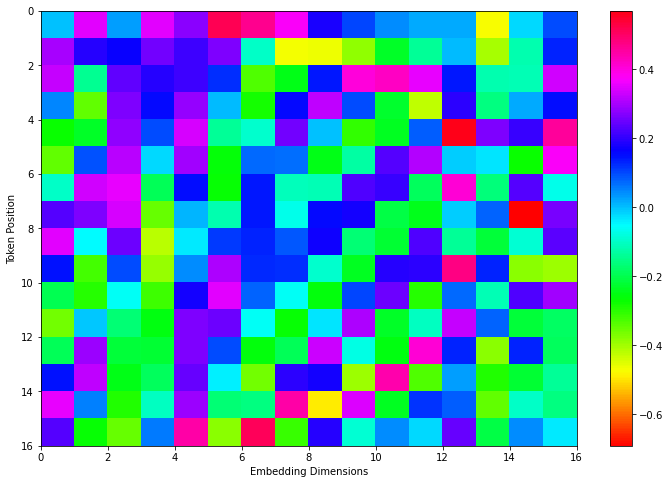

In [15]:

if check is False:
    print('Plot : Positional Encoding Matrix B Made Orthogonal by G-S method ')
    plt.figure(figsize=(12,8))
    plt.pcolormesh(Q, cmap='hsv')
    plt.xlabel('Embedding Dimensions')
    plt.xlim((0, dimensions))
    plt.ylim((tokens,0))
    plt.ylabel('Token Position')
    plt.colorbar()
    plt.show()
    